# Chest Xray Pneumonia Detection
<b>Abstract</b>:&nbsp;Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

<b>Lungs image pre-processing and compilation of dataset for deep learning&nbsp;:</b>&nbsp;The project is about diagnosing pneumonia from XRay images of lungs of a person using self laid convolutional neural network and tranfer learning via inceptionV3. The images were of size greater than 1000 pixels per dimension and the total dataset was tagged large and had a space of 1.2 Gb.

<b>Task</b>:&nbsp;Now we have to Regcognise the future images and give the prediction result

<b>Importing the library</b>

#  Model 1

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/home/suvhradip/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set,
                         steps_per_epoch = 4000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 1000)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
4000/4000 [==============================] - 1765s 441ms/step - loss: 0.1305 - acc: 0.9507 - val_loss: 0.3104 - val_acc: 0.9054
Epoch 2/10
4000/4000 [==============================] - 1766s 441ms/step - loss: 0.0895 - acc: 0.9666 - val_loss: 0.2183 - val_acc: 0.9327
Epoch 3/10
4000/4000 [==============================] - 1751s 438ms/step - loss: 0.0695 - acc: 0.9746 - val_loss: 0.3889 - val_acc: 0.9151
Epoch 4/10
4000/4000 [==============================] - 1771s 443ms/step - loss: 0.0559 - acc: 0.9790 - val_loss: 0.4123 - val_acc: 0.9071
Epoch 5/10
4000/4000 [==============================] - 1738s 435ms/step - loss: 0.0443 - acc: 0.9837 - val_loss: 0.4613 - val_acc: 0.9038
Epoch 6/10
4000/4000 [==============================] - 1738s 434ms/step - loss: 0.0364 - acc: 0.9861 - val_loss: 0.4326 - val_acc: 0.9103
Epoch 7/10
4000/4000 [==============================] - 1740s 435ms/step - loss: 0.

# Result Visualization

/home/suvhradip/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


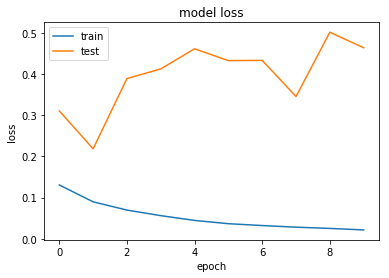

In [7]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

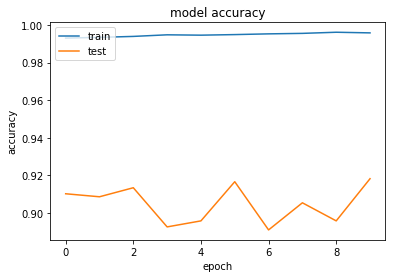

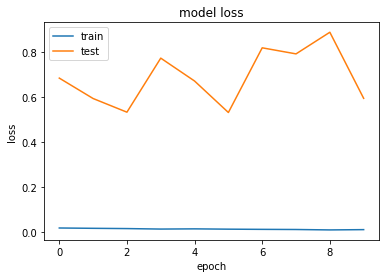

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 2
<ul>
  <li>ReLU Activation</li>
  <li>SGD optimzer</li>
  <li>Dropout + Batch Normalization</li>
</ul>
Here i am doing new architecture with improving the previous architecture

In [14]:

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import warnings
warnings.filterwarnings("ignore")

output_dim=10
batch_size = 128 
nb_epoch = 50
input_shape = (64, 64, 3)
#Initialize model
model = Sequential()

#CNN Layer 1
#input: 28X28 images with 1 channel -> (28X28X1) tensors.
#this applies 64 convolution filters of size 3X3 each.
model.add(ZeroPadding2D((1,1), input_shape=input_shape))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

#CNN Layer 2
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.4))

#Flatten the output before feeding these to the fully connected Neurons                                    
model.add(Flatten())

#Fully connected Layers
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

#Using adam as our optimzer
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#Get a summary of the model.
print(model.summary())

#Compile the model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_6 (ZeroPaddin (None, 66, 66, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
zero_padding2d_7 (ZeroPaddin (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 64)        0         
__________

In [15]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set,
                         steps_per_epoch = 4000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 1000)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
4000/4000 [==============================] - 1925s 481ms/step - loss: 0.0193 - acc: 0.9931 - val_loss: 0.6830 - val_acc: 0.9103
Epoch 2/10
4000/4000 [==============================] - 2400s 600ms/step - loss: 0.0178 - acc: 0.9935 - val_loss: 0.5926 - val_acc: 0.9087
Epoch 3/10
4000/4000 [==============================] - 1775s 444ms/step - loss: 0.0167 - acc: 0.9940 - val_loss: 0.5321 - val_acc: 0.9135
Epoch 4/10
4000/4000 [==============================] - 1743s 436ms/step - loss: 0.0145 - acc: 0.9948 - val_loss: 0.7715 - val_acc: 0.8926
Epoch 5/10
4000/4000 [==============================] - 1744s 436ms/step - loss: 0.0154 - acc: 0.9946 - val_loss: 0.6701 - val_acc: 0.8958
Epoch 6/10
4000/4000 [==============================] - 1738s 435ms/step - loss: 0.0140 - acc: 0.9949 - val_loss: 0.5308 - val_acc: 0.9167
Epoch 7/10
4000/4000 [==============================] - 1849s 462ms/step - loss: 0.

# Result Visualization 

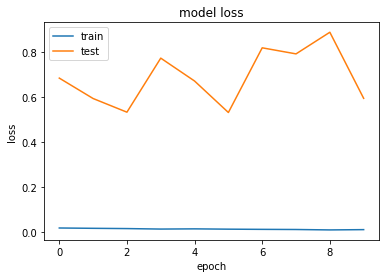

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='left')
plt.show()

# Example 

In [ ]:

'''
output_dim=10
batch_size = 128 
nb_epoch = 50
input_shape = 
#Initialize model
model = Sequential()

#CNN Layer 1
#input: 28X28 images with 1 channel -> (28X28X1) tensors.
#this applies 64 convolution filters of size 3X3 each.
model.add(ZeroPadding2D((1,1), input_shape=input_shape))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.4))
#Flatten the output before feeding these to the fully connected Neurons                                    
model.add(Flatten())

#Fully connected Layers
model.add(Dense(512, activation='relu', kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform'))

#compile the model
optim=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=optim)

#Get a summary of the model.
model.summary()

'''

# Model 3

<ul>
  <li>ReLU Activation</li>
  <li>RMSprop optimzer</li>
  <li>Dropout</li>
  <li>Model Architecture: 784-512-364-128-10</li>
</ul> 

**3 Hidden Layers**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 12, 12, 32)        9248      
__________

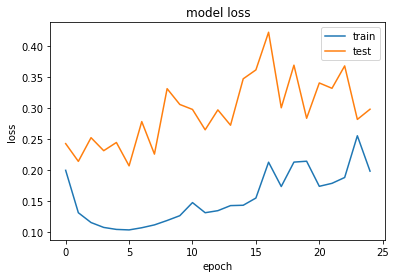

In [50]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

# Initialising the CNN
model_3_hidden= Sequential()

# Step 1 - Convolution
model_3_hidden.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Adding a second convolutional layer
model_3_hidden.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Adding a third convolutional layer
model_3_hidden.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Step 3 - Flattening
model_3_hidden.add(Flatten())

# Step 4 - Full connection
model_3_hidden.add(Dense(units = 128, activation = 'relu'))
model_3_hidden.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model_3_hidden.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model_3_hidden.summary()
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 64,
                                            class_mode = 'binary')

history=model_3_hidden.fit_generator(training_set,
                         steps_per_epoch = 4000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 1000)


# plotting training set and validation test 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='left')
plt.show()

Text(0.5,0,'Hidden Layer 3 ')

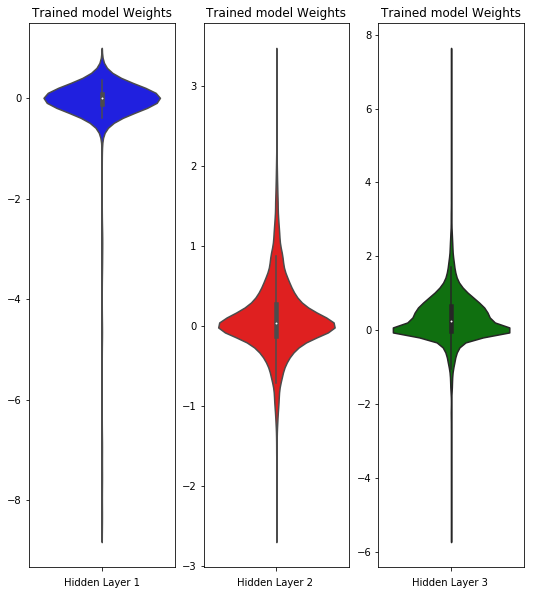

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
#Violin Plots for all the weights matrices.
w_after = model_3_hidden.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,10))
plt.title("Weight matrices after model is trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


<h1>Conclusion</h1>
<html>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
<body>
    <br>
    <b>Here are the results of our three models</b> 
<table border=1>
  <tr>
    <th>Model</th>
    <th>Architecture</th>
    <th>Training Accuracy</th>
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td>Model 1</td>
    <td>2:1 Arcitecture without using Batch Normalization and Dropout</td>
    <td>99%</td>
    <td>93%</td>
  </tr>
  <tr>
    <td>Model 2</td>
    <td>4:2 Achitecture using Batch Normalization and Dropout</td>
    <td>99%</td>
    <td>91%</td>
  </tr>
  <tr>
    <td>Model 3</td>
    <td>3:1 Convolutional layer</td>
    <td>96%</td>
    <td>93%</td>
  </tr>
</table>
</body>
</html>